![Portada](image.png)
# UNIVERSIDAD DEL VALLE DE M√âXICO

## MATERIA: An√°lisis de Datos Masivos

### UNIDAD 2: Trabajar con datos en Python

#### ACTIVIDAD 2: An√°lisis de caso

**ESTUDIANTE:** ARTURO NAHUM NIEVES SANTOS  

**DOCENTE:** Dr. Ernesto Bautista Thompson  

**24 DE MARZO DE 2024**


## An√°lisis de Atletas Ol√≠mpicos con M√°s Medallas de Oro
Los Juegos Ol√≠mpicos han sido el escenario de haza√±as deportivas y logros extraordinarios desde su inicio en 1896. A lo largo de la historia, m√°s de 35,000 medallas han sido otorgadas a atletas de todo el mundo pero solo unos pocos han logrado destacar como los ganadores de medallas de oro en la historia ol√≠mpica.

Este an√°lisis explorar√° para los juegos de verano:

- ¬øC√≥mo ha evolucionado la participaci√≥n femenina en comparaci√≥n con la masculina?

- ¬øQui√©nes han sido los 30 atletas con mejor desempe√±o?

- Pa√≠ses con m√°s y menos medallas que el promedio y como se distribuyen alrededor de la desviaci√≥n est√°ndar.


Un dato interesante a se√±alar es que en las primeras ediciones de los Juegos Ol√≠mpicos, los ganadores recib√≠an medallas de plata y coronas de olivo, pero posteriormente, el Comit√© Ol√≠mpico Internacional (IOC) ajust√≥ la clasificaci√≥n para reflejar el sistema que actualmente conocemos de oro, plata y bronce.

A trav√©s del an√°lisis de datos en Python, utilizaremos t√©cnicas de procesamiento, visualizaci√≥n y exploraci√≥n de datos para responder estas preguntas y obtener informaci√≥n valiosa sobre la evoluci√≥n del √©xito ol√≠mpico en distintas disciplinas y pa√≠ses.

El conjunto de datos nos ofrece 9 datos por cada registro Year, City, Sport, Discipline,Athlete, Country, Gender, Event y Medal desde el a√±o 1896 hasta el 2012.

Tambi√©n disponemos de datos m√°s espec√≠ficos por cada pa√≠s en el archivo dictionary que contiene los siguietes datos por registro: Country, Code, Population, GDP per Capita.


# ¬øC√≥mo ha evolucionado la participaci√≥n femenina en comparaci√≥n con la masculina?


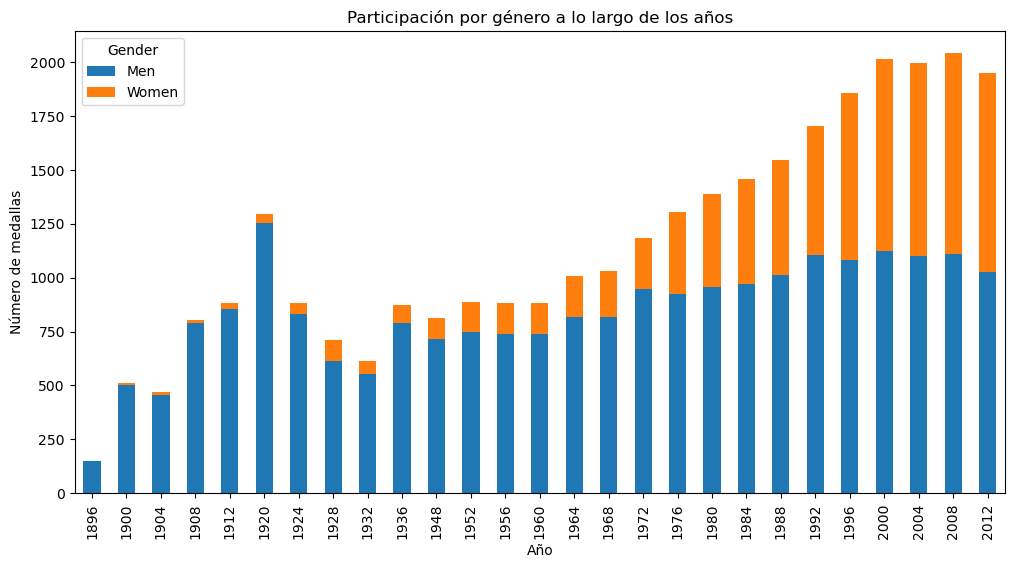

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer archivo CSV
summer_csv = pd.read_csv("olympic-games/summer.csv")
countries_csv = pd.read_csv("olympic-games/dictionary.csv")


genero_por_anio = summer_csv.groupby(['Year', 'Gender'])['Medal'].count().unstack(fill_value=0)
genero_por_anio.plot(kind='bar', stacked=True, figsize=(12, 6), title='Participaci√≥n por g√©nero a lo largo de los a√±os')
plt.xlabel('A√±o')
plt.ylabel('N√∫mero de medallas')
plt.show()


# ¬øQui√©nes han sido los 30 atletas con mejor desempe√±o?


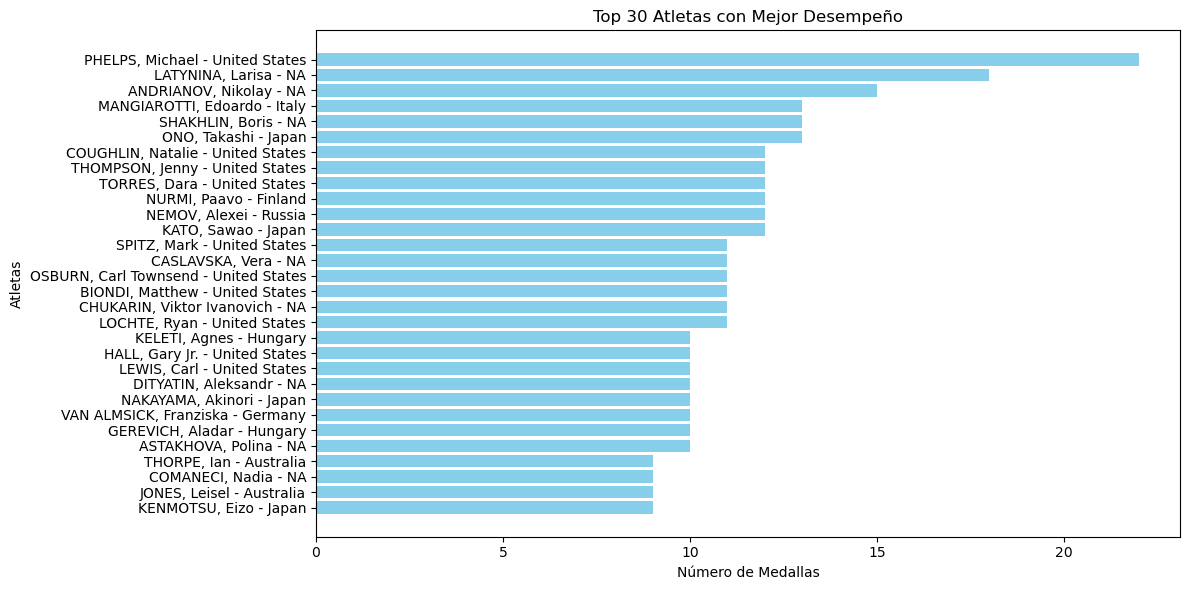

In [50]:
# ¬øQui√©nes han sido los 30 atletas con mejor desempe√±o?
import pandas as pd
import matplotlib.pyplot as plt

# Leer archivo CSV
countries_csv = pd.read_csv("olympic-games/dictionary.csv")
country_dict = {rows[1]:rows[0] for rows in countries_csv.values}

medallas_por_atleta = summer_csv.groupby(['Athlete','Country'])['Medal'].count().sort_values(ascending=False)

# Obtener los 30 atletas con mejor desempe√±o
top_30_atletas = medallas_por_atleta.head(30)

# Agregar la nacionalidad usando el diccionario
top_30_atletas = top_30_atletas.reset_index()
top_30_atletas['Nationality'] = top_30_atletas['Country'].map(country_dict).fillna('NA')

#Graficar los top 30 atletas
plt.figure(figsize=(12, 6))


# Concatenate Athlete, Country, and Nationality for the labels
labels = top_30_atletas['Athlete'] + ' - ' +  top_30_atletas['Nationality'] 

# Plot the bar chart
plt.barh(labels, top_30_atletas['Medal'], color='skyblue')
plt.xlabel('N√∫mero de Medallas')
plt.ylabel('Atletas')
plt.title('Top 30 Atletas con Mejor Desempe√±o')
plt.gca().invert_yaxis()  # Invertir el eje Y para que el mejor est√© arriba
plt.tight_layout()
plt.show()

# ¬øCu√°les han sido los pa√≠ses con m√°s medallas de oro?


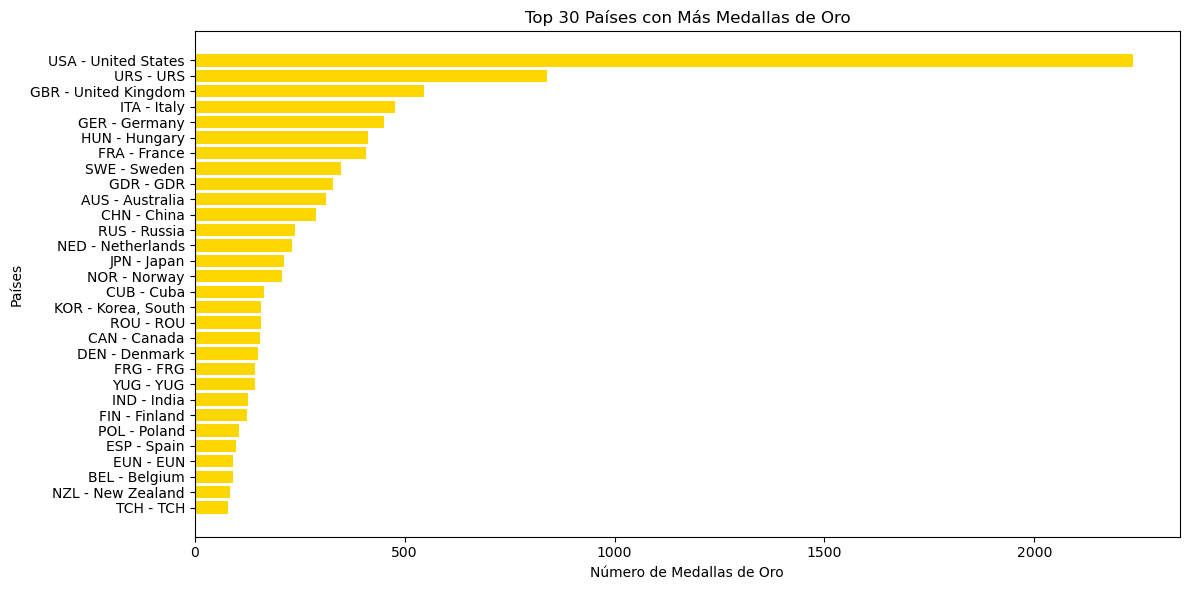

In [51]:
# ¬øCu√°les han sido los pa√≠ses con m√°s medallas de oro?
import pandas as pd
import matplotlib.pyplot as plt


# Filtrar solo las medallas de oro
oro_csv = summer_csv[summer_csv['Medal'] == 'Gold']

# Agrupar por pa√≠s y contar las medallas de oro
medallas_de_oro_por_pais = oro_csv.groupby('Country')['Medal'].count().sort_values(ascending=False)

# Obtener los 30 pa√≠ses con m√°s medallas de oro
top_30_paises = medallas_de_oro_por_pais.head(30).reset_index()

# Agregar la nacionalidad usando el diccionario, si no existe, usar la clave  del pa√≠s
top_30_paises['Nationality'] = top_30_paises['Country'].map(country_dict).fillna(top_30_paises['Country'])

# Graficar los top 30 pa√≠ses
plt.figure(figsize=(12, 6))

# Concatenar Country y Nationality para las etiquetas
labels = top_30_paises['Country'] + ' - ' + top_30_paises['Nationality']

# Crear el gr√°fico de barras
plt.barh(labels, top_30_paises['Medal'], color='gold')
plt.xlabel('N√∫mero de Medallas de Oro')
plt.ylabel('Pa√≠ses')
plt.title('Top 30 Pa√≠ses con M√°s Medallas de Oro')
plt.gca().invert_yaxis()  # Invertir el eje Y para que el mejor est√© arriba
plt.tight_layout()
plt.show()

# Pa√≠ses con m√°s y menos medallas que el promedio y como se distribuyen alrededor de la desviaci√≥n est√°ndar.

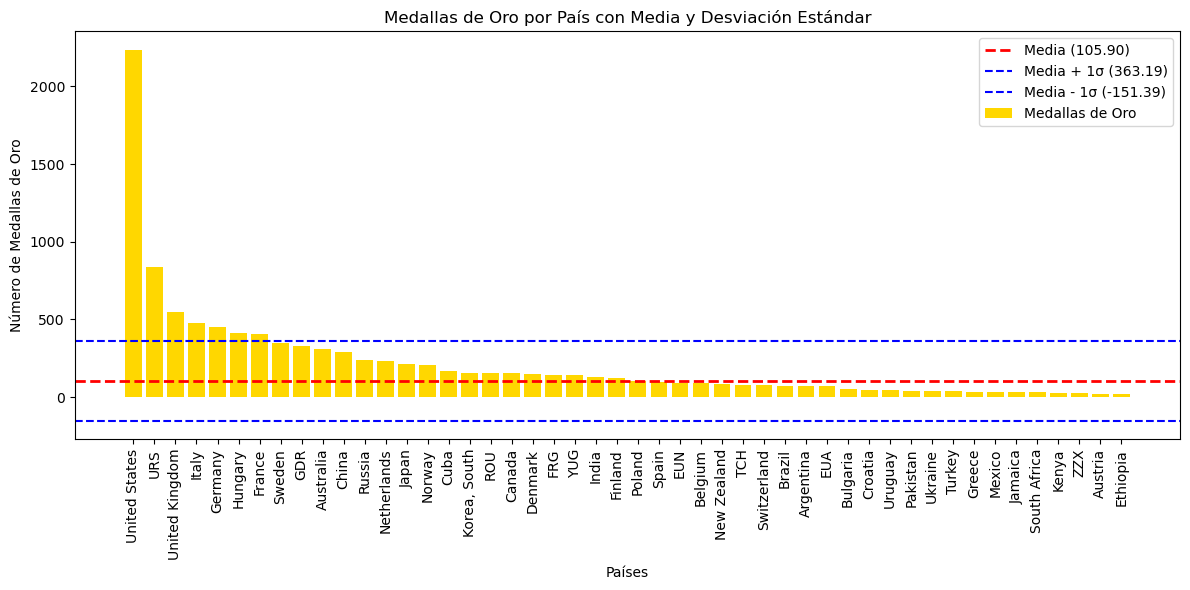

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Filtrar solo las medallas de oro
oro_csv = summer_csv[summer_csv['Medal'] == 'Gold']

# Agrupar por pa√≠s y contar las medallas de oro
medallas_de_oro_por_pais = oro_csv.groupby('Country')['Medal'].count().sort_values(ascending=False)

# Agregar nombre del pa√≠s usando el diccionario, si no existe, usar la clave  del pa√≠s
medallas_de_oro_por_pais = medallas_de_oro_por_pais.reset_index()
medallas_de_oro_por_pais['Country_Name'] = medallas_de_oro_por_pais['Country'].map(country_dict).fillna(medallas_de_oro_por_pais['Country'])
medallas_de_oro_por_pais_filtradas = medallas_de_oro_por_pais[medallas_de_oro_por_pais['Medal'] > 20]
# Calcular estad√≠sticas
medallas_array = medallas_de_oro_por_pais['Medal'].values
media = np.mean(medallas_array)
desviacion = np.std(medallas_array)

# Graficar los datos de medallas de oro por pa√≠s
plt.figure(figsize=(12, 6))
plt.bar(medallas_de_oro_por_pais_filtradas['Country_Name'], medallas_de_oro_por_pais_filtradas['Medal'], color='gold', label='Medallas de Oro')

# Agregar l√≠nea de la media
plt.axhline(y=media, color='red', linestyle='--', linewidth=2, label=f'Media ({media:.2f})')

# Agregar l√≠neas de desviaci√≥n est√°ndar
plt.axhline(y=media + desviacion, color='blue', linestyle='--', linewidth=1.5, label=f'Media + 1œÉ ({(media + desviacion):.2f})')
plt.axhline(y=media - desviacion, color='blue', linestyle='--', linewidth=1.5, label=f'Media - 1œÉ ({(media - desviacion):.2f})')

# Personalizar el gr√°fico
plt.xlabel('Pa√≠ses')
plt.ylabel('N√∫mero de Medallas de Oro')
plt.title('Medallas de Oro por Pa√≠s con Media y Desviaci√≥n Est√°ndar')
plt.xticks(rotation=90)  # Rotar etiquetas de pa√≠ses para mejor visibilidad
plt.legend()
plt.tight_layout()
plt.show()


# Conclusi√≥n
Conclusi√≥n
A lo largo de la historia de los Juegos Ol√≠mpicos, los pa√≠ses m√°s destacados en t√©rminos de medallas de oro han sido aquellos con una fuerte tradici√≥n deportiva y recursos significativos para invertir en el desarrollo de atletas de alto rendimiento. Entre ellos destacan:

- Estados Unidos, que ha liderado consistentemente en el n√∫mero de medallas de oro, gracias a su infraestructura deportiva, programas de entrenamiento y una amplia base de atletas.
La Uni√≥n Sovi√©tica y Rusia, que han demostrado un dominio notable en varias disciplinas, especialmente durante la Guerra Fr√≠a, cuando el deporte era una herramienta de prestigio internacional.
- Reino Unido, que ha mantenido un desempe√±o s√≥lido, especialmente en los √∫ltimos a√±os, impulsado por programas como el "UK Sport" y el √©xito de los Juegos Ol√≠mpicos de Londres 2012.
- Alemania, que ha sido un competidor constante, tanto antes como despu√©s de la reunificaci√≥n, destac√°ndose en deportes como atletismo, ciclismo y deportes de invierno.
- Italia, que ha sobresalido en disciplinas como esgrima, ciclismo y deportes acu√°ticos.

En general, los datos reflejan c√≥mo el √©xito en los Juegos Ol√≠mpicos est√° influenciado no solo por el talento individual de los atletas, sino tambi√©n por factores como la inversi√≥n en deporte, la infraestructura y el contexto hist√≥rico y pol√≠tico de cada pa√≠s.

# Referencias

- Project Jupyter. (s. f.). Installing Jupyter. https://jupyter.org/install

- Olympic Sports and Medals, 1896-2014. (2017, 24 enero). Kaggle. https://www.kaggle.com/datasets/the-guardian/olympic-games

- Pandas | Anaconda.org. (s. f.). https://anaconda.org/anaconda/pandas

- MacTEX - TEX Users Group. (s. f.). https://tug.org/mactex/

- How to Convert ipynb to PDF in Jupyter Notebook | Saturn Cloud Blog. (2023, 7 diciembre). https://saturncloud.io/blog/how-to-convert-ipynb-to-pdf-in-jupyter-notebook/
- A2 Ciencia de Datos. (2022, 16 agosto). El tutorial m√°s importante sobre NumPy  ü•∏ [V√≠deo]. YouTube. https://www.youtube.com/watch?v=cYm3DBG6KfI

- datasciencecamp. (2023, 30 diciembre). Matplotlib | Visualizaci√≥n de datos con Python | Nivel B√°sico [V√≠deo]. YouTube. https://www.youtube.com/watch?v=RdFpsjghKxk



